In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## [Problem 1] Linear function
Consider the following equation where is in the range $-50$ to $50$
$$
y = \frac{x}{2} + 1
$$
Create a ndarray that represents $x$ in intervals of $-50$ to $50$ and a ndarray that represents $y$ for each element.

In [2]:
x_ndarray = np.arange(-50, 50.1, 0.1)
print(x_ndarray.shape)
y_ndarray = x_ndarray/2 + 1
print(y_ndarray.shape)

(1001,)
(1001,)


## [Problem 2] Array combination
Combine the ndarrays created in Problem 1 into an array of the form (1001, 2). Make sure x is in the 0th column and y is in the 1st column.

In [17]:
xy = np.concatenate((x_ndarray[:,np.newaxis], y_ndarray[:,np.newaxis]),axis = 1)
#xy = np.reshape(xy,(2,1001)).T
xy.shape

(1001, 2)

## [Problem 3] Find the gradient
Find the slope at each x coordinate. Known that
$$
\text{gradient} = \frac{\text{amount of change in Y}}{\text{amount of change in X}}
$$

In [12]:
gradient = (xy[1:,1] - xy[:-1,1])/(xy[1:,0] - xy[:-1,0])
gradient.shape

(1000,)

## [Problem 4] Draw a graph
Draw a graph of the linear function using Matplotlib. Also, draw a graph with x on the horizontal axis and gradient on the vertical axis.

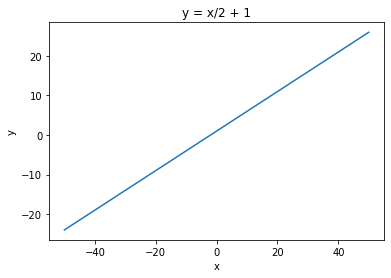

In [10]:
xpoints = x_ndarray
ypoints = y_ndarray

plt.title("y = x/2 + 1")
plt.plot(xpoints, ypoints)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

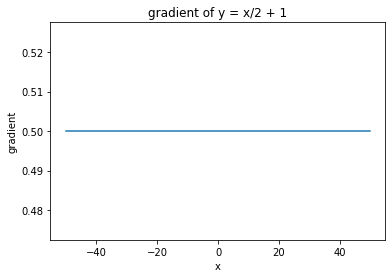

In [13]:
xpoints = xy[:-1,0]
ypoints = gradient

plt.title("gradient of y = x/2 + 1")
plt.plot(xpoints, ypoints)
plt.xlabel("x")
plt.ylabel("gradient")
plt.show()

## [Problem 5] Python functionalization
Please refer to the template to create a Python function that summarizes the problems 1 to 3.

Then, calculate the gradient of the following three equations at 0.1 intervals and output it with ndarray.
$$
y = x^{2} \quad (-50\leq x \leq 50)\\
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$

In [30]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    x_ndarray = np.arange(*x_range)
    y_ndarray = function(x_ndarray)
    
    xy = np.concatenate((x_ndarray[:,np.newaxis], y_ndarray[:,np.newaxis]),axis = 1)
    gradient = (xy[1:,1] - xy[:-1,1])/(xy[1:,0] - xy[:-1,0])
    
    return xy, gradient

def function1(array_x):
    return array_x**2

def function2(array_x):
    return 2*array_x**2 + 2**array_x

def function3(array_x):
    return np.sin(array_x**(1/2))

In [75]:
xy1, gradient1 = compute_gradient(function1)
xy2, gradient2 = compute_gradient(function2)
xy3, gradient3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))


Draw the graph as in question 4

Text(0, 0.5, 'gradient')

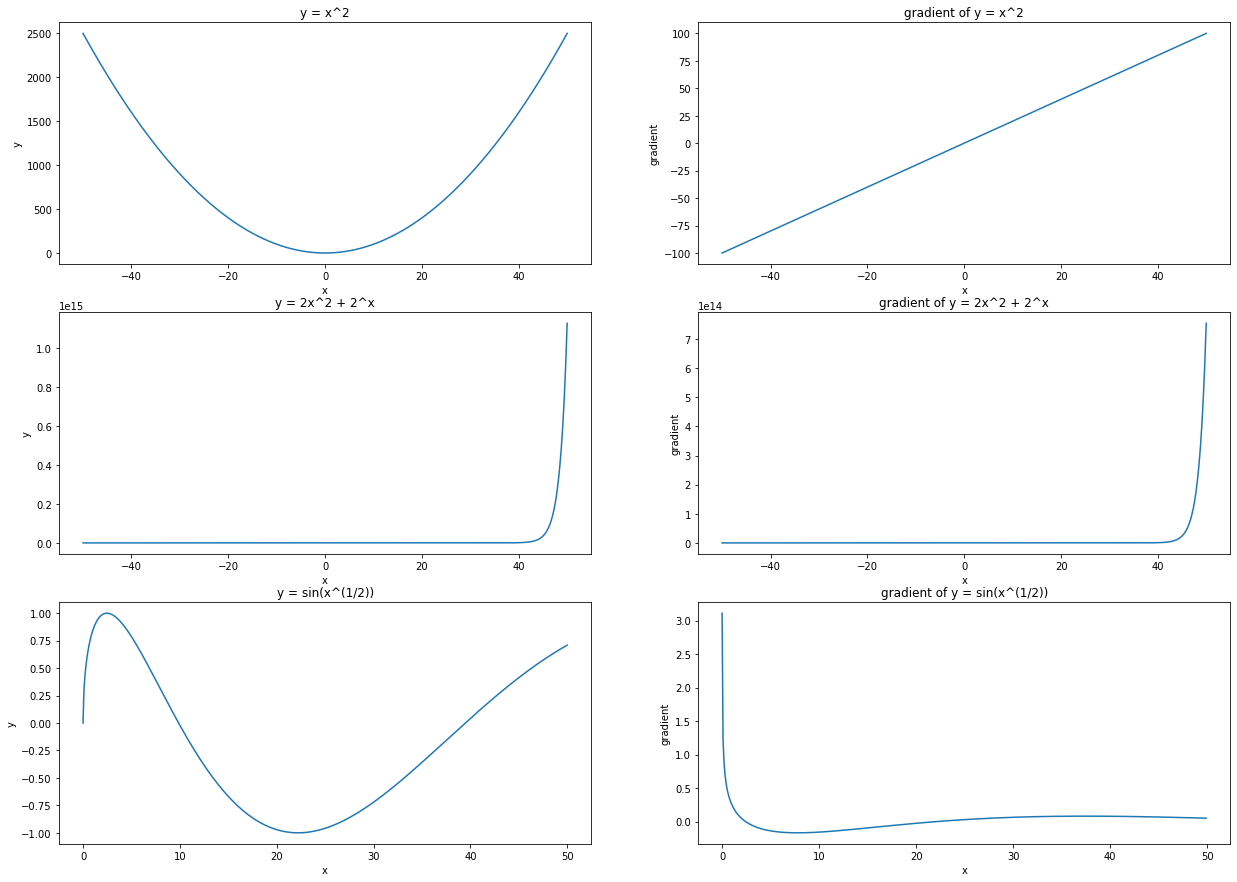

In [67]:
plt.subplots(figsize=(17, 12))
plt.tight_layout()

plt.subplot(321)
plt.title("y = x^2")
plt.plot(xy1[:,0], xy1[:,1])
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(322)
plt.title("gradient of y = x^2")
plt.plot(xy1[:-1,0], gradient1)
plt.xlabel("x")
plt.ylabel("gradient")

plt.subplot(323)
plt.title("y = 2x^2 + 2^x")
plt.plot(xy2[:,0], xy2[:,1])
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(324)
plt.title("gradient of y = 2x^2 + 2^x")
plt.plot(xy2[:-1,0], gradient2)
plt.xlabel("x")
plt.ylabel("gradient")

plt.subplot(325)
plt.title("y = sin(x^(1/2))")
plt.plot(xy3[:,0], xy3[:,1])
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(326)
plt.title("gradient of y = sin(x^(1/2))")
plt.plot(xy3[:-1,0], gradient3)
plt.xlabel("x")
plt.ylabel("gradient")

## [Problem 6] Find the minimum value
Find the minimum value of y for the function treated in Problem 5. The range of x is the same as in question 5.

In [81]:
print(np.amin(xy1[:,1]), np.argmin(xy1[:,1]))
print(np.amin(xy2[:,1]), np.argmin(xy2[:,1]))
print(np.amin(xy3[:,1]), np.argmin(xy3[:,1]))

5.048709793414476e-25 500
0.9505505632959851 498
-0.9999997540298113 222


Also, display the gradient before and after taking the minimum y.

In [87]:
print(gradient1[490:510])
print(gradient2[488:508])
print(gradient3[212:232])

[-1.9 -1.7 -1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7
  0.9  1.1  1.3  1.5  1.7  1.9]
[-4.28758786 -3.86516496 -3.44113269 -3.01537554 -2.58776971 -2.15818251
 -1.72647174 -1.29248498 -0.85605887 -0.41701833  0.02482428  0.46967008
  0.91773463  1.36924892  1.82446058  2.28363497  2.74705652  3.21503004
  3.68788226  4.16596334]
[-0.01111112 -0.00991828 -0.00873263 -0.00755423 -0.00638312 -0.00521937
 -0.00406302 -0.00291412 -0.00177271 -0.00063884  0.00048745  0.00160612
  0.00271712  0.00382043  0.004916    0.0060038   0.00708379  0.00815594
  0.00922022  0.0102766 ]
